In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<h2>Choosing the features from the portfolio</h2>

In [187]:
df = pd.read_csv('data/portfolio_2022-12-24.csv', index_col = 1)
df.columns

Index(['Unnamed: 0', 'Market Cap (B)', 'Enterprise Value (B)', 'Trailing P/E',
       'Forward P/E', 'PEG Ratio (5 yr expected)', 'Price/Sales (ttm)',
       'Price/Book (mrq)', 'Enterprise Value/Revenue',
       'Enterprise Value/EBITDA', 'Beta (5Y Monthly)', '52 Week Change (%)',
       'S&P500 52-Week Change (%)', '52 Week High ', '52 Week Low ',
       '50-Day Moving Average ', '200-Day Moving Average ',
       'Avg Vol 3 month (M)', 'Avg Vol 10 day (M)', 'Shares Outstanding (M)',
       'Implied Shares Outstanding (M)', 'Float', '% Held by Insiders ',
       '% Held by Institutions ', 'Shares Short (M)', 'Short Ratio  ',
       'Short % of Float  ', 'Short % of Shares Outstanding  ',
       'Shares Short Prior Month (M)', 'Forward Annual Dividend Rate ',
       'Forward Annual Dividend Yield (%)', 'Trailing Annual Dividend Rate ',
       'Trailing Annual Dividend Yield ', '5 Year Average Dividend Yield ',
       'Payout Ratio (%)', 'Last Split Factor (x:1)', 'Profit Margin (%)',
 

In [188]:
features = ['Market Cap (B)', 'Revenue (ttm) (B)', 'Profit Margin (%)','52 Week Change (%)']
X = df[features]

<h2>Quick visualisation of the relationships</h2>

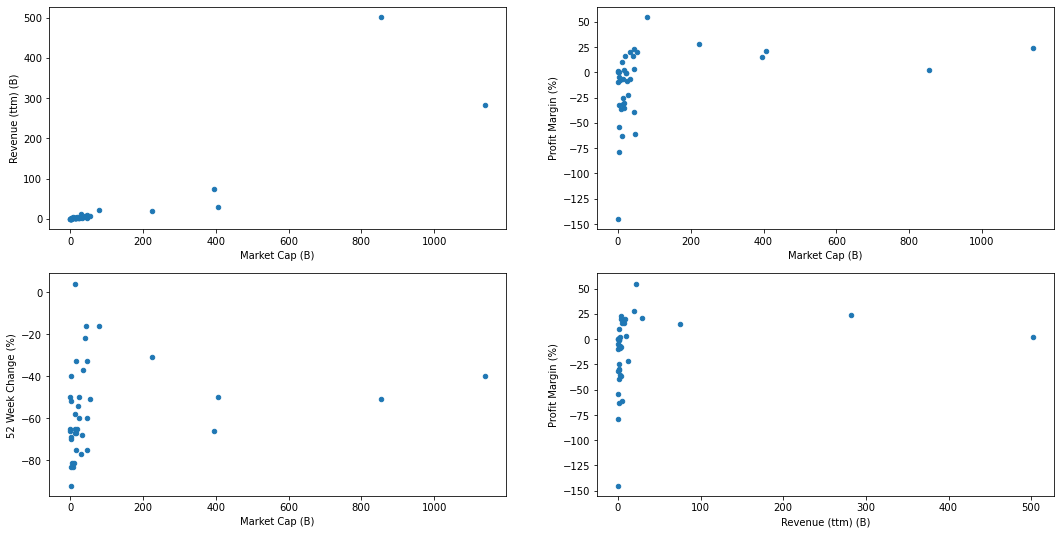

In [189]:
f = plt.figure(figsize=(18,9))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

X.plot(kind='scatter', x='Market Cap (B)',y='Revenue (ttm) (B)', ax=ax1)
X.plot(kind='scatter', x='Market Cap (B)',y='Profit Margin (%)', ax=ax2)
X.plot(kind='scatter', x='Market Cap (B)',y='52 Week Change (%)', ax=ax3)
X.plot(kind='scatter', x='Revenue (ttm) (B)',y='Profit Margin (%)', ax=ax4)
plt.show()

<h2>MixMaxScaling</h2>
<p>Data to be inverse transformed after the analysis</p>

In [190]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, index=X.index, columns=X.columns)
X.head()

,Market Cap (B),Revenue (ttm) (B),Profit Margin (%),52 Week Change (%)
Ticker,,,,
TSLA,0.347211,0.149050,0.800,0.270833
TTD,0.020009,0.002927,0.720,0.395833
NVDA,0.356070,0.056872,0.830,0.437500
GOOG,1.000000,0.561751,0.845,0.541667
CRWD,0.022070,0.004022,0.680,0.437500


<h3>Elbow method to determine k number of clusters</h3>

Text(0.5, 1.0, 'Elbow curve')

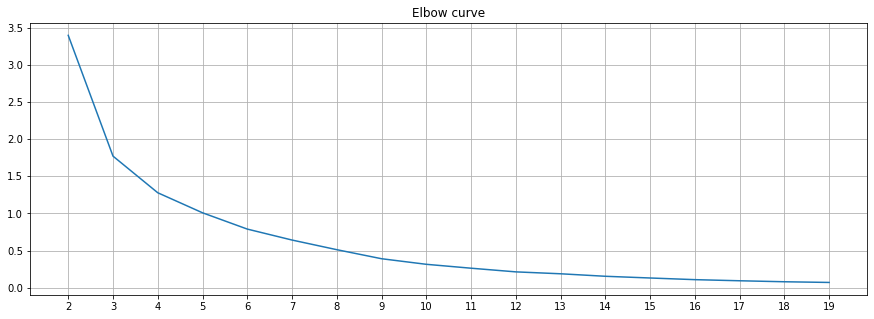

In [191]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_) #Inertia is the sum of squared distances of samples to their closest cluster center.

fig = plt.figure(figsize=(15, 5))
plt.xticks(np.arange(2,21,1))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [192]:
k = 4
model = KMeans(n_clusters=k,  
               random_state=0)

In [193]:
portfolio_kmeans = model.fit(X)
unscaled = scaler.inverse_transform(X)
portfolio_analysis = pd.DataFrame(unscaled, index=X.index, columns=X.columns)
portfolio_analysis['Cluster'] = portfolio_kmeans.labels_
portfolio_analysis.sort_values(by='Cluster')


,Market Cap (B),Revenue (ttm) (B),Profit Margin (%),52 Week Change (%),Cluster
Ticker,,,,,
SHOP,46.04,5.24,-61.0,-75.0,0
U,11.18,1.26,-63.0,-81.0,0
GLBE,3.15,0.35,-54.0,-69.0,0
ASAN,2.84,0.51,-79.0,-83.0,0
TWLO,8.29,3.64,-36.0,-83.0,0
LMND,1.06,0.21,-145.0,-66.0,0
IDXX,34.20,3.34,20.0,-37.0,1
PINS,17.05,2.77,2.0,-33.0,1
MRNA,80.04,21.39,55.0,-16.0,1


<h2>Determining Centroids and displaying the data</h2>

In [194]:
unscaled = scaler.inverse_transform(portfolio_kmeans.cluster_centers_)
centroids_df = pd.DataFrame(unscaled, columns=features)
centroids_df['Cluster'] = centroids_df.index
centroids_df

,Market Cap (B),Revenue (ttm) (B),Profit Margin (%),52 Week Change (%),Cluster
0,12.093333,1.868333,-73.0,-76.166667,0
1,90.699000,9.745000,17.8,-27.400000,1
2,997.400000,392.150000,13.0,-45.500000,2
3,36.716000,6.093000,-10.5,-64.650000,3


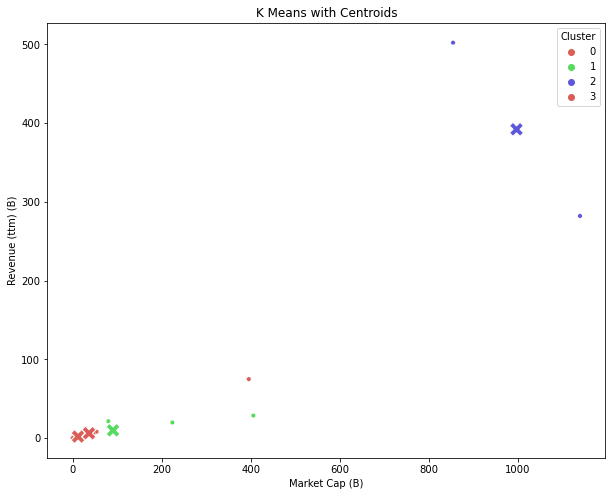

In [195]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot()

# # Scatter Plot for All Records Colored by Their Labels
sns.scatterplot(data = portfolio_analysis, x='Market Cap (B)',y='Revenue (ttm) (B)', hue='Cluster', ax=ax1,
                palette='hls', s=20)

# Scatter Plot for Centroids
sns.scatterplot(data = centroids_df, x='Market Cap (B)',y='Revenue (ttm) (B)', hue='Cluster', ax=ax1, 
                marker="X", palette='hls', s= 200, legend=False)

ax1.set_title("K Means with Centroids")
plt.show()

In [196]:
'''X_P = pd.DataFrame([{'Ticker' : 'TXT',
                    'Market Cap (B)' : 60,
                    'Revenue (ttm) (B)' : 5}])

display(X_P)

ans = portfolio_kmeans.predict(X_P[features])
ans'''

"X_P = pd.DataFrame([{'Ticker' : 'TXT',\n                    'Market Cap (B)' : 60,\n                    'Revenue (ttm) (B)' : 5}])\n\ndisplay(X_P)\n\nans = portfolio_kmeans.predict(X_P[features])\nans"